# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/home/santosh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/santosh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Load the dataset

In [2]:
data = pd.read_csv("avocado.csv")

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
#checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [5]:
#lets check the null values
data.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [6]:
#droping null values and unused columnn
data.dropna(inplace = True)
data.drop("Unnamed: 0", axis = 1, inplace  = True)

In [7]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [8]:
#shape of the data
data.shape

(1517, 13)

In [9]:
#renaming columns for easy usage
data = data.rename(columns = {'Total Volume' : 'Total_Volume', 'Total Bags' : 'Total_Bags', 'Small Bags' : 'Small_Bags',
                   'Large Bags' : 'Large_Bags', 'XLarge Bags' : 'XLarge_Bags'})

In [10]:
data

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [11]:
#replcing zeros with meanvalue
mean_x_bags = data['XLarge_Bags'].mean()
print(mean_x_bags)
data['XLarge_Bags']=data.XLarge_Bags.mask(data.XLarge_Bags == 0,mean_x_bags)

2181.7710744891233


In [12]:
#replacing zeros with meanvalue for Large_bags
mean_l_bags = data['Large_Bags'].mean()
print(mean_l_bags)
data['Large_Bags']=data.Large_Bags.mask(data.Large_Bags == 0,mean_l_bags)

42642.049373764


In [13]:
data

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2181.771074,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2181.771074,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2181.771074,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2181.771074,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2181.771074,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.280000,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,2181.771074,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.000000,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2181.771074,conventional,2016.0,Charlotte


In [14]:
#we can drop this colim as there is no use with this 
data["type"].unique()

array(['conventional'], dtype=object)

In [15]:
#checking the year types in the dataset, there are two types of variables.
data["year"].nunique()

2

In [16]:
#nunique method used to show us the no of unique variables availible
data["region"].nunique()

51

In [17]:
#we will be changing the datatypes of dataset
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [18]:
data.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2181.771074,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2181.771074,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2181.771074,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2181.771074,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2181.771074,conventional,2015.0,Albany,11,29


# Exploratory Data Analysis

In [19]:
#check the null values
data.isnull().sum()

Date            0
AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [20]:
#checking the statistical data like mean, std, percentile min ans mx values in dataset
data.describe()

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.640872e+04,3329.466076,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.174735e+05,7194.714130,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,1.840000e+00,1.500000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,1.549290e+03,711.050000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,9.791400e+03,2181.771074,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,4.264205e+04,2181.771074,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


# Correlation 

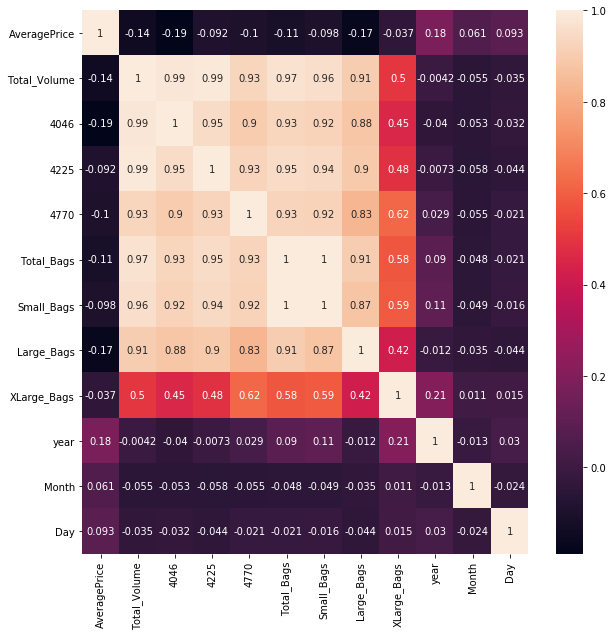

In [21]:
#checking the correlation of data using data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot = True)

In [22]:
#there are some high correlated values in the dataset so lets remove them using a function
def correlation(dataset, threshold):
    cor_set = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                cor_set.add(colname)
    return cor_set

fea = correlation(data, 0.95)
print(fea)

{'Small_Bags', '4225', '4046', 'Total_Bags'}


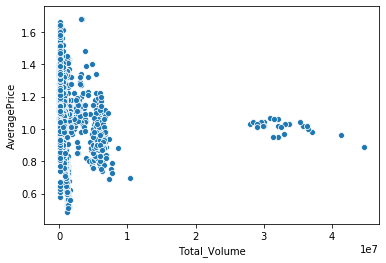

In [23]:
#plotting between average price and total volume of the dataset
sns.scatterplot(y = "AveragePrice", x = "Total_Volume", data = data)

In [24]:
data = data.drop(columns=["Date","region","type"],axis = 1)

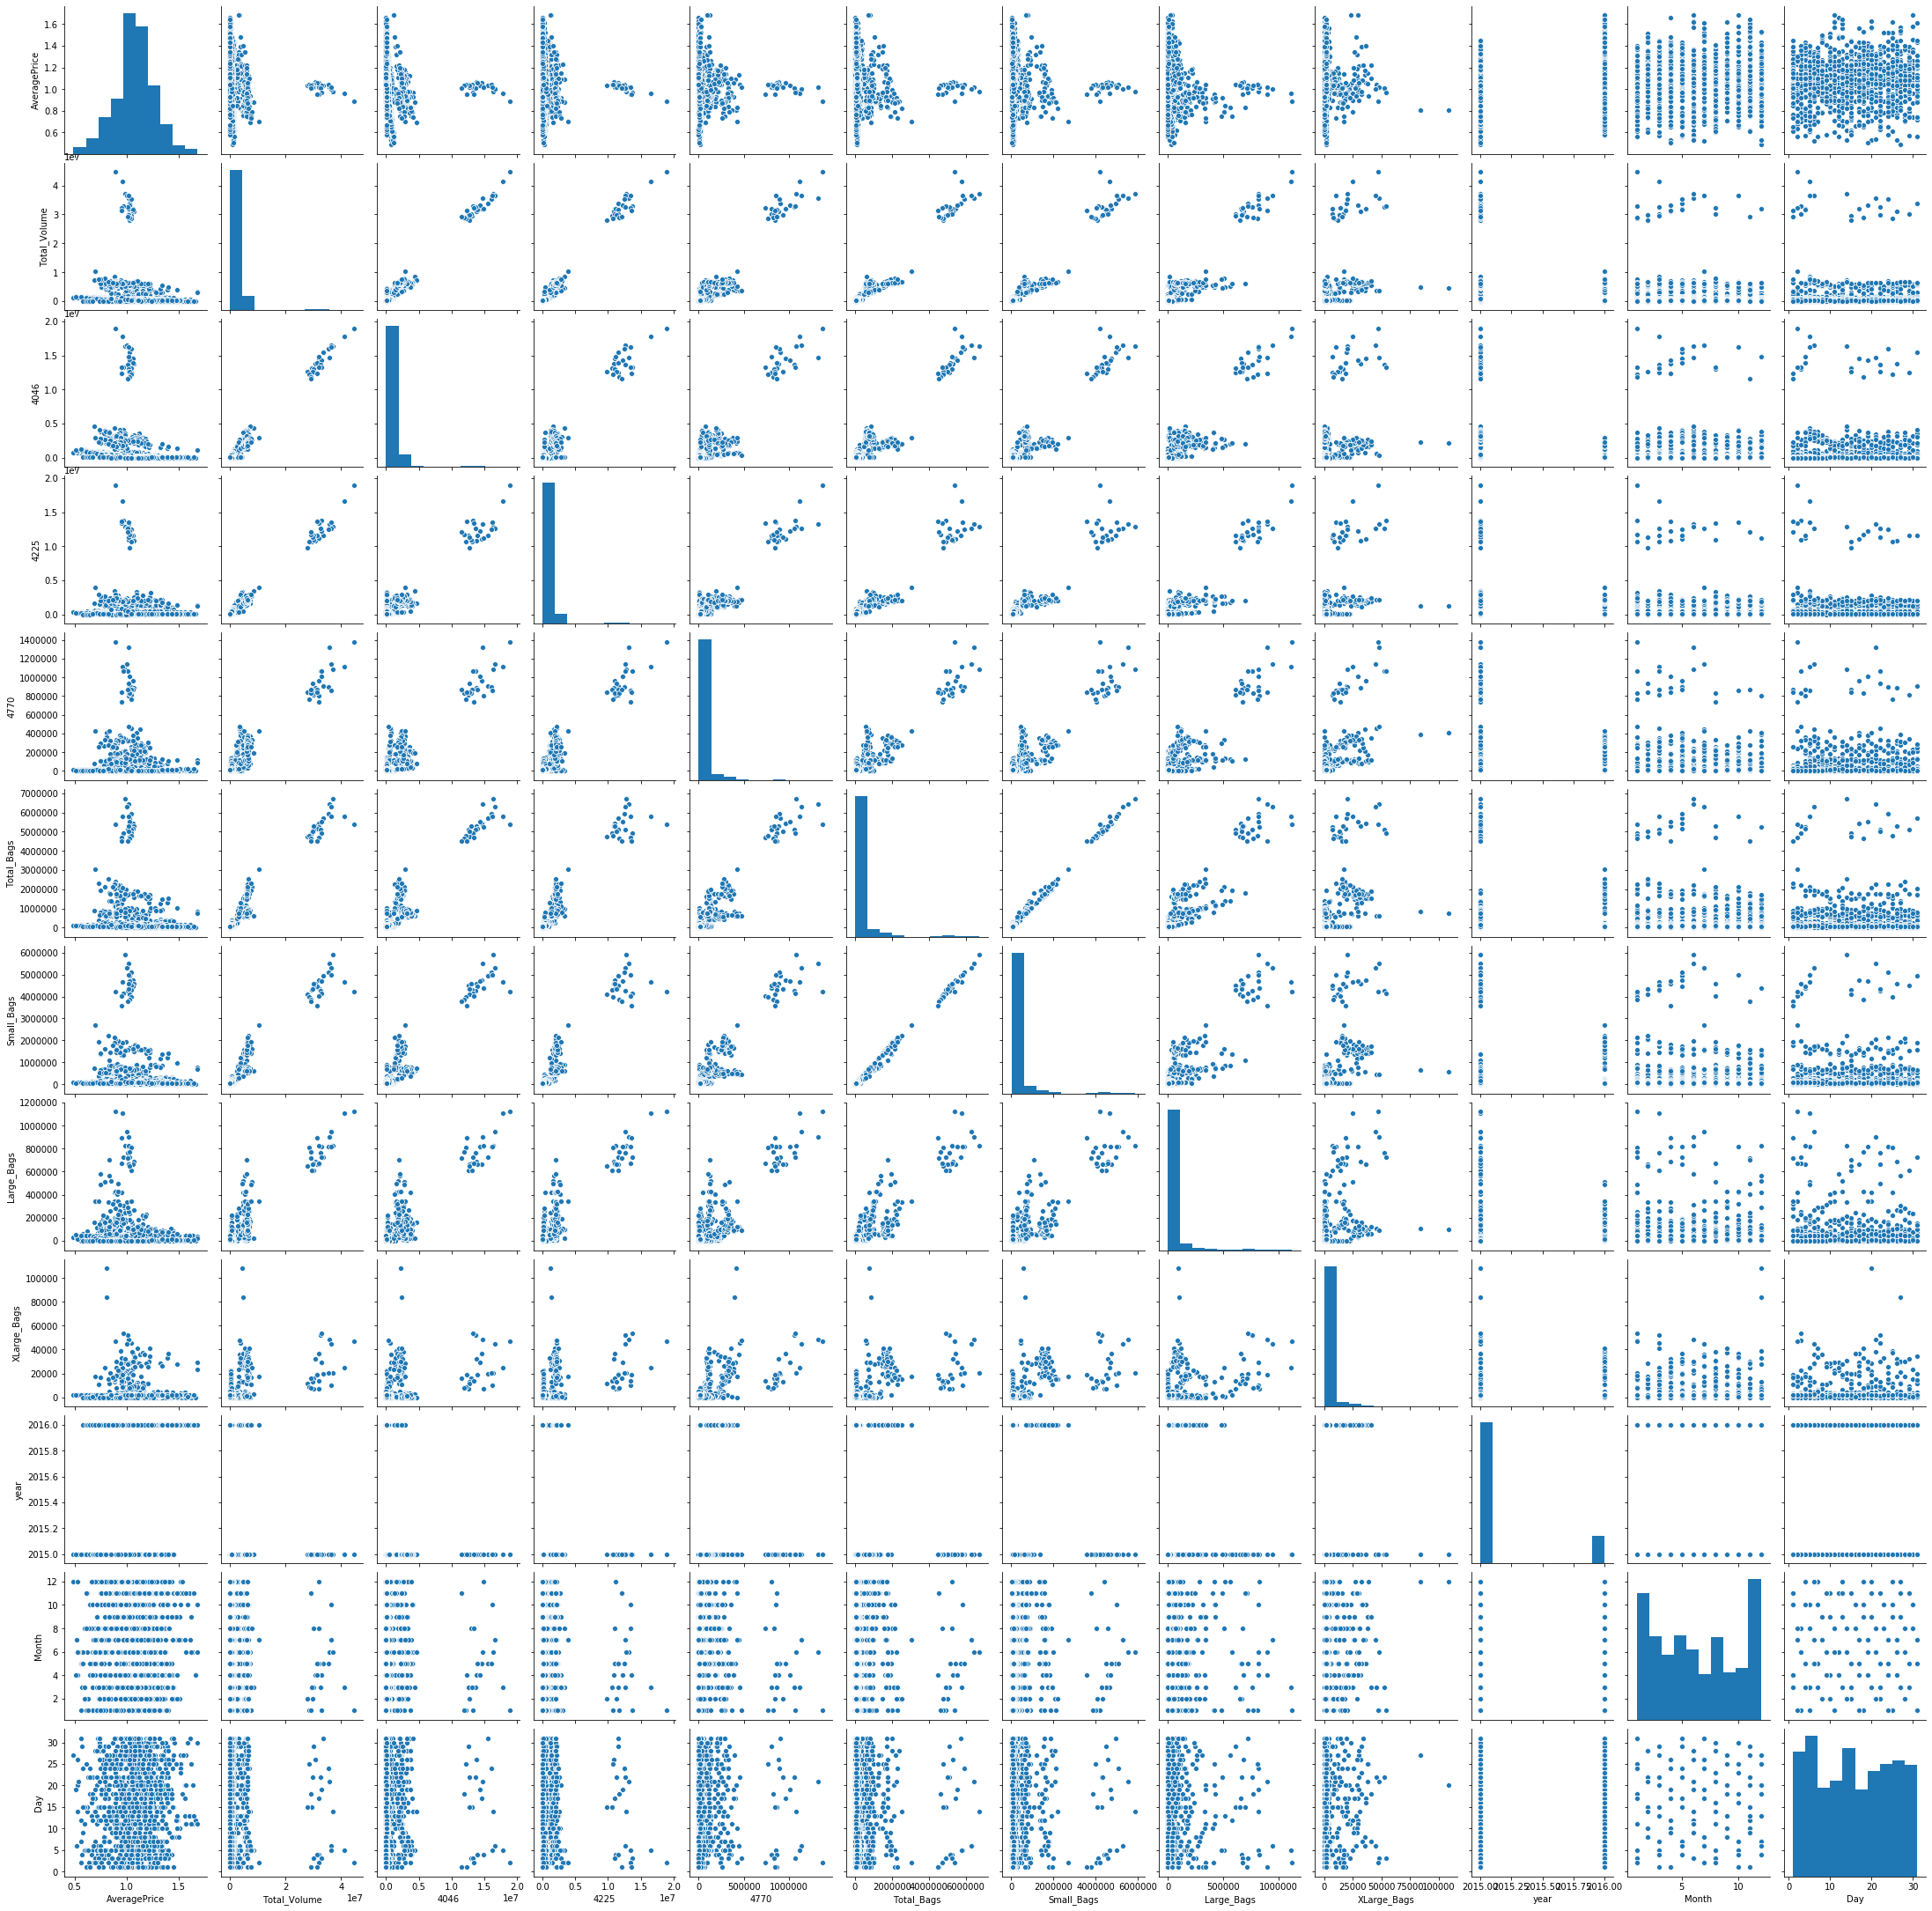

In [25]:
sns.pairplot(data)

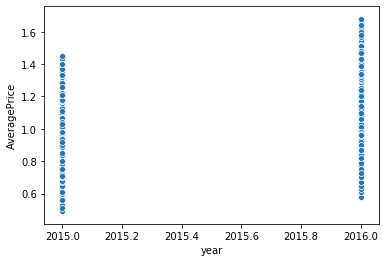

In [26]:
sns.scatterplot(y = "AveragePrice", x = "year", data = data)

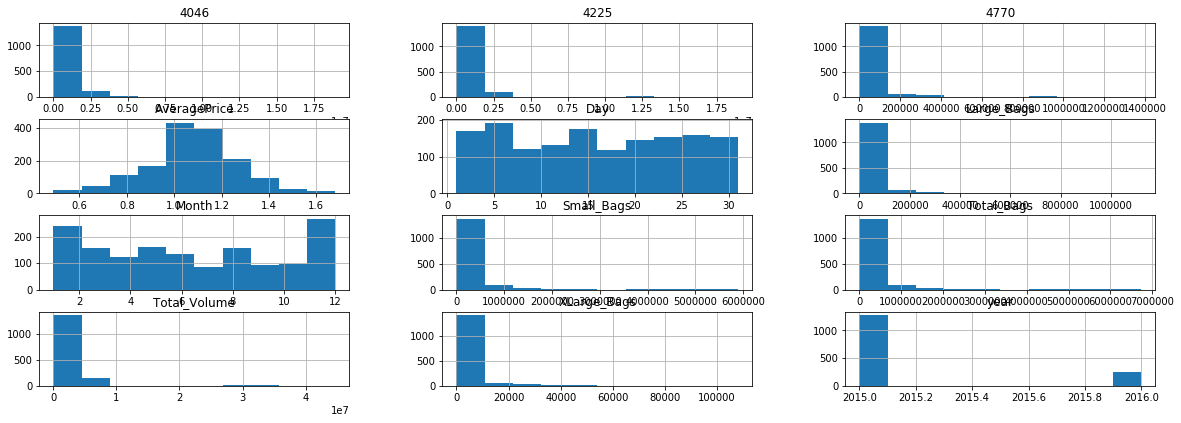

In [27]:
data.hist(figsize=[20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

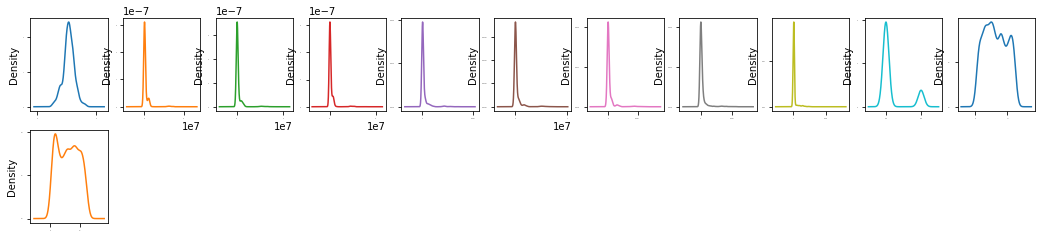

In [28]:
data.plot(kind = 'density', subplots = True, layout = (6, 11), sharex = False, legend = False, fontsize = 1, figsize = (18,12))
plt.show()

# Outliers

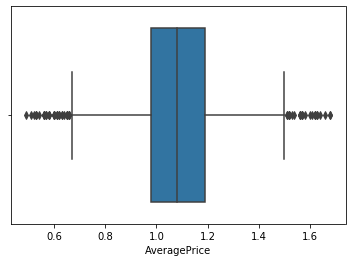

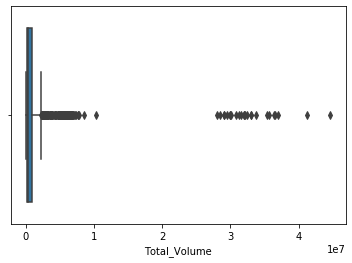

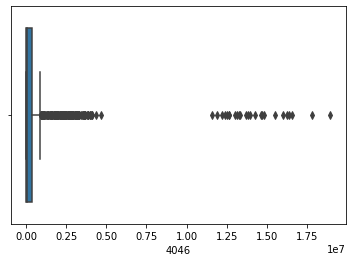

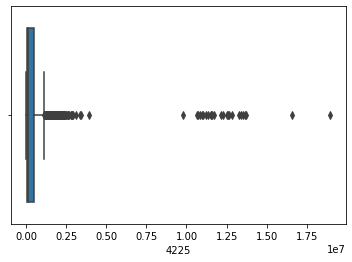

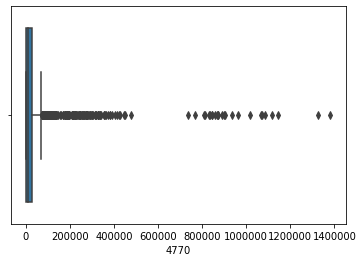

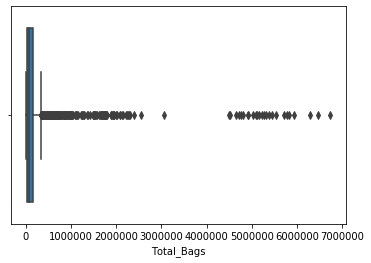

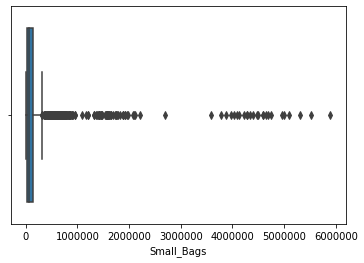

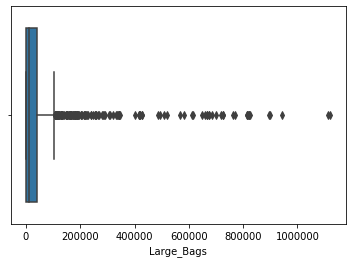

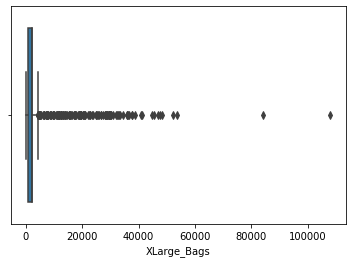

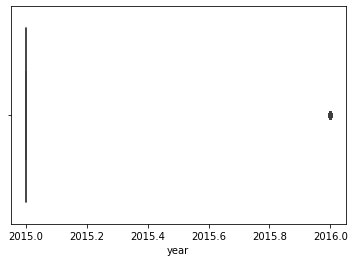

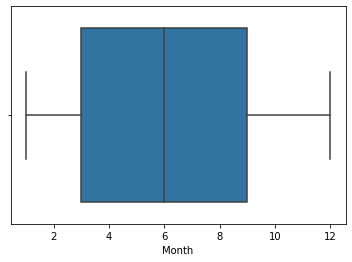

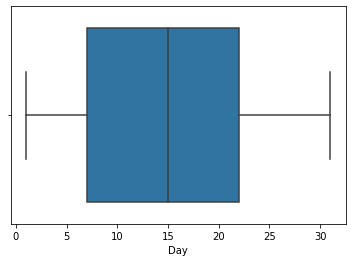

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f008c442a50>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f008c3e4110>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f008c34bd10>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f008c2ce110>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f008c2bd810>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f008c231a10>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f00912bf290>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f008c460c10>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0092f71a10>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f009146bdd0>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0091485f90>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f009046bb50>, None)]

In [29]:
#In machine learning outlier detection is most important for building an accutate model to get good results
[(sns.boxplot(data[i]), plt.show()) for i in data]

In [30]:
data

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2181.771074,2015.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2181.771074,2015.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2181.771074,2015.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2181.771074,2015.0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2181.771074,2015.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.280000,2016.0,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,2181.771074,2016.0,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.000000,2016.0,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2181.771074,2016.0,9,25


# Feature Engineering

In [31]:
#lets handle the outliers from the data


In [59]:
#from scipy.stats import zscore
#z = np.abs(zscore(data))
#threshold = 3
#print(np.where(z > 3))
#newdata = data[(z < 3).all(axis=1)]
#print("data before :", data.shape)
#print("data after :", newdata.shape)
#data = newdata
#i have used robust scalar for outliers

In [33]:
data

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2181.771074,2015.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2181.771074,2015.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2181.771074,2015.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2181.771074,2015.0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2181.771074,2015.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.280000,2016.0,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,2181.771074,2016.0,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.000000,2016.0,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2181.771074,2016.0,9,25


In [34]:
#dividing the dataset into x and y
x = data.drop(["AveragePrice"], axis = 1)
y = data["AveragePrice"]

In [35]:
x.shape,y.shape

((1517, 11), (1517,))

In [36]:
#using robust scaler
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
new = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x = new

In [37]:
#now lets standardize the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new_x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = new_x

In [38]:
#lets check the skewness and applying power transform
from sklearn.preprocessing import power_transform
data_x = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns= x.columns)
x = data_x

In [39]:
x.skew()

Total_Volume    0.892329
4046            1.024828
4225            0.791879
4770            0.961398
Total_Bags      0.970437
Small_Bags      0.955455
Large_Bags      0.694002
XLarge_Bags     0.145106
year            1.828332
Month           0.013789
Day             0.015810
dtype: float64

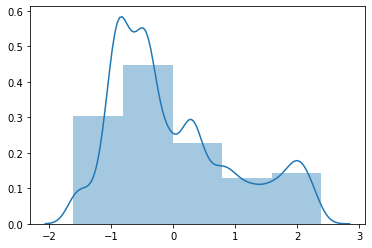

In [40]:
sns.distplot(x, bins= 5)

# model creation

In [41]:
#Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1016, 11) (1016,) (501, 11) (501,)


In [42]:
#import the necessary libraries
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt

In [43]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LinearRegression()))
models.append(('L', Lasso()))
models.append(('R', Ridge()))
models.append(('DEC', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVC', SVR()))
models.append(('RAN', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.426600, 0.077009
L: -0.014847, 0.015268
R: 0.426712, 0.077252
DEC: 0.588558, 0.116879
KNN: 0.607468, 0.099195
SVC: 0.662823, 0.059831
RAN: 0.764878, 0.049605
ADA: 0.617261, 0.061408


In [44]:
#Loading the instances models
lr = LinearRegression()
l = Lasso()
r = Ridge()
dec = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svc = SVR()
ran = RandomForestRegressor()
ada = AdaBoostRegressor()



In [45]:
#creating a list of models
model = []
model.append(('LinearRegression', LinearRegression()))
model.append(('Lasso', Lasso()))
model.append(('ridge', Ridge()))
model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
model.append(('KNeighborsRegressor', KNeighborsRegressor()))
model.append(('SVR', SVR()))
model.append(('RandomForestRegressor', RandomForestRegressor()))
model.append(('AdaBoostRegressor', AdaBoostRegressor()))



score of  LinearRegression is: 45.503991859800664
[0.94157407 1.19421016 1.07030234 1.16181319 1.17838302 1.13651578
 1.07591399 1.13050635 0.96279369 1.13473842 1.11208604 1.20766994
 1.1569605  1.20751828 0.8882785  1.03823858 0.92309589 1.13211069
 1.2155118  1.05809332 0.95161559 0.9033204  1.30331504 1.03647366
 1.05441989 1.22415933 1.0688546  1.03069903 1.0179912  1.1400333
 1.05389294 1.15174495 0.99679468 1.16154506 1.07494922 0.98758907
 1.01835561 1.07038509 1.0613843  1.20078089 1.13777005 1.10621283
 1.05878767 1.10582519 1.17410501 1.00975571 1.12023193 1.17457958
 1.16224624 1.01402429 1.01428588 1.16820117 0.92642215 1.03359055
 0.91036207 1.10584765 1.02180113 1.2432331  1.09194306 0.992959
 0.87146735 1.06069382 1.24053092 1.10327275 1.12841695 1.26856001
 1.06528623 1.13189699 0.98142212 1.09263334 1.14162957 1.14586945
 1.05050973 1.18840484 1.15970265 1.23881071 1.14121172 1.04374961
 1.06940728 1.03919776 1.2183306  1.21864759 0.9217587  1.13246123
 0.73408287 1.1

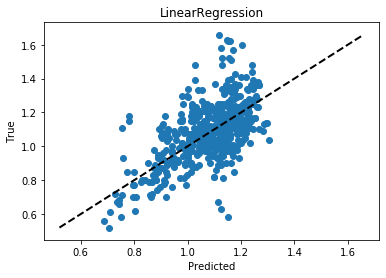

score of  Lasso is: 0.0
[1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827 1.07135827
 1.07135827 1.07135827 1.07135827 1.07

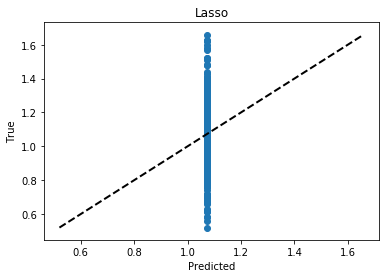

score of  ridge is: 45.489607114991664
[0.94510797 1.19420743 1.07095481 1.1624097  1.17924791 1.1352531
 1.07510814 1.13052516 0.96249221 1.133564   1.11135457 1.20818292
 1.15638296 1.20457882 0.89076258 1.03771356 0.91979272 1.13245483
 1.21667486 1.05809323 0.9533629  0.90080315 1.30066593 1.03692223
 1.05748197 1.22603497 1.06872056 1.03114692 1.0187013  1.14079975
 1.05269173 1.15203354 0.99471432 1.16285355 1.07498318 0.98585039
 1.01729221 1.07025265 1.06446873 1.20265893 1.13618859 1.10952133
 1.05717001 1.10737698 1.17242582 1.01046511 1.11948166 1.17711541
 1.1626244  1.01410984 1.01529454 1.16714111 0.92371057 1.03329512
 0.912593   1.10614623 1.02286361 1.24133735 1.09163732 0.9942016
 0.87053448 1.06074978 1.23943041 1.10391979 1.12688388 1.26558553
 1.06507118 1.13037978 0.98224289 1.09223932 1.14324236 1.14435119
 1.05100113 1.18660816 1.16212088 1.23868492 1.14214472 1.04420779
 1.06923467 1.03967555 1.22046213 1.21566693 0.92042381 1.13613958
 0.73735848 1.15116685 0.

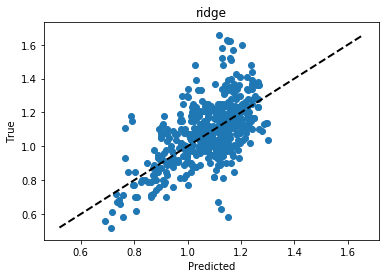

score of  DecisionTreeRegressor is: 100.0
[0.92 1.4  0.99 0.91 1.34 1.09 1.11 1.18 0.79 1.18 1.24 1.1  1.   1.23
 1.11 1.17 0.95 1.01 0.99 1.08 0.97 1.1  1.18 0.97 0.99 1.18 0.94 1.09
 1.04 1.2  1.14 1.19 0.88 1.39 0.99 0.99 0.92 0.97 1.19 1.11 1.02 0.95
 1.02 1.15 0.9  1.03 1.22 1.39 1.18 0.92 0.97 1.12 1.15 1.32 0.75 0.83
 1.11 1.3  1.05 0.99 0.82 1.14 1.29 1.09 1.21 1.36 0.95 1.11 1.33 1.23
 0.99 1.03 1.04 1.34 1.09 1.15 1.03 1.14 1.19 1.05 1.05 1.4  1.12 1.21
 0.6  1.1  0.6  0.99 0.88 1.23 1.11 1.21 0.94 0.99 1.39 1.31 1.27 1.11
 1.03 0.96 1.44 1.45 1.37 1.24 1.12 1.16 1.14 0.82 1.01 1.17 1.15 1.06
 0.93 1.24 0.61 1.19 0.99 1.56 0.89 1.21 1.25 1.19 1.27 1.04 1.09 1.26
 1.1  1.47 0.96 1.43 1.18 0.69 0.94 0.89 1.   1.26 1.02 1.21 1.   1.07
 1.21 1.23 1.25 0.72 1.02 1.04 1.15 0.77 1.   0.9  1.21 1.27 0.97 0.97
 1.15 1.24 1.16 1.18 1.16 0.95 1.24 1.08 1.09 1.15 1.09 1.21 1.11 1.15
 1.04 1.17 1.23 1.03 1.16 1.04 0.99 1.18 1.11 0.95 0.79 1.02 1.02 1.08
 1.05 0.84 1.26 1.   1.18 1.05 1.28

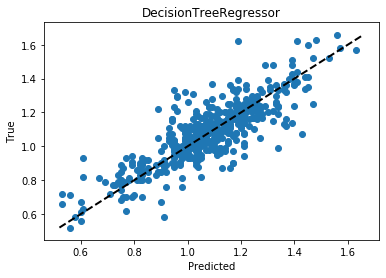

score of  KNeighborsRegressor is: 77.02934009622292
[0.97  1.392 1.02  1.434 1.498 1.1   1.064 1.056 0.924 1.148 1.162 1.146
 0.986 1.064 1.004 1.17  0.868 0.824 1.174 1.116 0.972 0.942 1.224 1.028
 1.02  1.156 1.184 1.052 1.026 1.194 1.054 1.364 0.94  1.516 1.124 1.19
 0.89  1.14  1.194 1.164 1.262 1.072 1.09  1.11  1.102 1.048 1.136 1.16
 1.21  0.988 1.056 1.034 1.036 1.196 0.726 0.844 1.06  1.14  1.018 1.08
 0.872 1.06  1.198 0.91  1.224 1.3   1.04  1.05  1.09  1.182 1.128 1.112
 1.086 1.218 1.144 1.222 1.062 1.094 1.132 1.076 1.062 1.116 1.128 1.144
 0.776 1.108 0.78  1.134 1.154 1.152 1.062 1.176 1.158 1.014 0.954 1.336
 1.226 1.11  0.92  1.214 1.224 1.192 1.156 1.142 1.104 1.192 1.192 0.846
 0.946 1.09  1.116 1.226 0.952 1.242 0.908 1.336 1.246 0.892 0.912 1.166
 1.052 0.814 1.188 1.066 1.164 1.262 1.108 1.08  0.98  1.136 1.144 0.916
 1.07  1.07  1.112 1.186 0.998 1.076 1.14  1.178 1.184 1.148 1.062 0.792
 0.982 1.104 1.154 0.768 0.992 1.026 1.122 1.154 1.032 0.994 1.224 1.152
 1

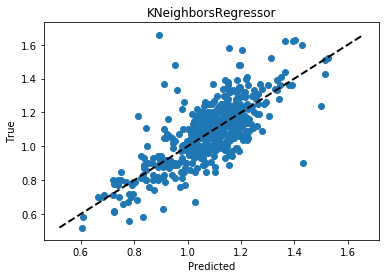

score of  SVR is: 77.43707175550148
[0.90291922 1.44477859 1.0223627  1.37698927 1.47628978 1.08223316
 1.07921039 1.06877212 0.93863362 1.14939663 1.13851463 1.16969399
 1.17470949 1.20537301 0.9783755  1.12393369 0.92184178 0.84124809
 1.18493581 1.11038576 0.93259659 0.91549514 1.2555119  1.07487691
 0.9794849  1.08974299 1.04255157 0.99340444 1.04943065 1.22261837
 1.07944425 1.41496942 0.8635864  1.45111714 1.09330144 1.15940576
 0.89440555 1.04647011 1.17778745 1.14231653 1.1538743  1.15790635
 1.05472838 1.15459535 1.20134491 0.99534857 1.15494342 1.05663012
 1.22655461 0.93956869 1.04258099 1.13608217 0.99252781 1.2259936
 0.78196786 0.90282298 1.05215964 1.18174276 1.07608847 1.00891206
 0.91775092 1.08657459 1.10505882 0.98250149 1.18847702 1.32375672
 1.05675419 1.10718085 1.08614612 1.18505464 1.08445144 1.13157728
 1.01328802 1.18705488 1.08637634 1.20219258 1.09807069 1.15756134
 1.08396267 1.04525337 1.1487944  1.16213629 1.12462231 1.17733186
 0.78038549 1.11516573 0.65

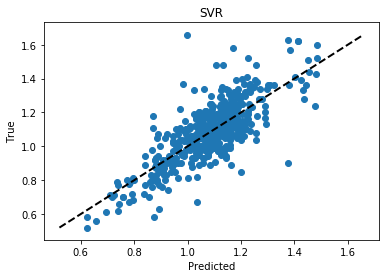

score of  RandomForestRegressor is: 96.9324637280866
[0.8482 1.4218 1.033  0.9798 1.4143 1.1214 1.0969 1.1546 0.9506 1.1155
 1.1245 1.1509 1.2589 1.1692 1.027  1.1117 0.9111 0.9707 1.0417 1.033
 1.0058 1.0754 1.1821 1.0004 1.0461 1.1978 1.0386 1.077  1.0337 1.1603
 1.0275 1.4494 0.8932 1.3724 1.0238 1.0305 0.9072 1.0465 1.1934 1.0671
 1.1822 1.082  1.0497 1.2436 1.1351 1.0278 1.052  1.2    1.1496 0.9775
 0.9812 1.1807 1.1557 1.23   0.7534 0.853  1.0508 1.3207 1.0365 1.0773
 0.8414 1.1074 1.3659 1.134  1.1251 1.344  1.009  1.1441 1.2118 1.1543
 1.0324 1.107  1.0475 1.3183 1.1046 1.1352 1.0544 0.9952 1.176  1.0938
 1.0785 1.2733 1.1888 1.1809 0.5904 1.0599 0.6413 1.0654 0.9671 1.1765
 1.0764 1.1776 1.0263 1.0231 1.3625 1.3868 1.1953 1.1459 1.0304 1.0961
 1.3961 1.3189 1.2666 1.1637 1.1188 1.1685 1.1898 0.8344 1.0416 1.0781
 1.2146 1.1814 0.9564 1.1826 0.7882 1.4014 1.079  1.4077 0.9786 1.1296
 1.0547 1.0922 1.17   1.0345 1.1419 1.1435 1.0541 1.3591 1.0026 1.2455
 1.1807 0.7951 1.004  0.9

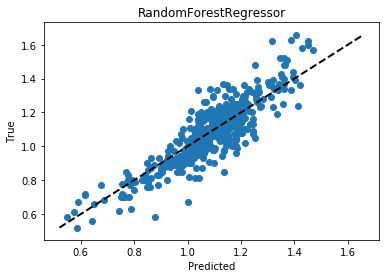

score of  AdaBoostRegressor is: 68.32465481316933
[0.86952607 1.39626556 1.07010256 1.07010256 1.4225614  1.13831081
 1.05625698 1.14780083 0.98886364 1.10303571 1.10303571 1.21788779
 1.24739496 1.19601796 1.09558442 1.05625698 0.95837209 1.00820513
 1.14731343 1.06183432 1.05048951 0.97941176 1.14296167 1.06991477
 1.06991477 1.18866142 1.07673077 1.05185455 1.04285714 1.08317618
 1.07851852 1.41858447 0.95298246 1.41858447 1.10303571 1.06767677
 0.96777778 1.06991477 1.1335461  1.0330137  1.19088028 1.01838235
 1.01878151 1.05475248 1.16008811 1.03707692 1.07673077 1.18866142
 1.08566176 1.02482014 1.13831081 1.14731343 0.99273408 1.4225614
 0.82877907 0.82765957 1.03264624 1.24739496 1.08522593 1.07026087
 0.96777778 1.06991477 1.34957082 1.10826087 1.16336927 1.20810427
 1.10245902 1.14780083 1.08522593 1.14780083 1.04657895 1.1751049
 1.05185455 1.20253968 1.08522593 1.17475524 1.13962791 1.07851852
 1.08258065 1.04245098 1.18415789 1.20810427 0.9817     1.08566176
 0.72165138 1.

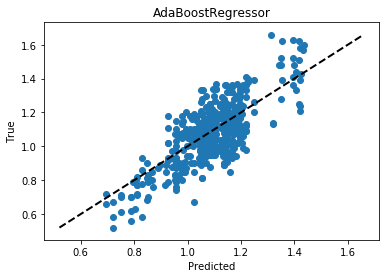

In [46]:
#creating a loop for predicting the data
for n, m in model:
    m.fit(x_train,y_train)
    print("score of ",n,"is:", m.score(x_train,y_train)*100)
    predm = m.predict(x_test)
    print(predm)
    #metrics for evaluating regression
    print("r2 score is :", r2_score(y_test, predm))
    print("MSE :",mean_squared_error(y_test, predm))
    print("MAE :",mean_absolute_error(y_test, predm))
    print("RMSE:", sqrt(mean_squared_error(y_test, predm)))
    print("\n")
    #plotting regression plot
    plt.scatter(predm, y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(n)
    plt.show()

# Hyper parameter tuning

In [47]:
#setting parameters for gridsearch_cv
random_params = {
    
    'n_estimators': [10, 20 ,30, 100],
    'max_depth': [10, 20, 30, 40, 50, 60]
    
}

In [48]:
grid1 = GridSearchCV(RandomForestRegressor(), random_params, cv = 5)

In [49]:
#fitting the model
grid1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [50]:
#getting the best parameters 
print(grid1.best_params_)

{'max_depth': 20, 'n_estimators': 100}


In [51]:
Randomforest_prediction = grid1.predict(x_test)
print(grid1.score(x_train,y_train))
print(Randomforest_prediction)
print("r2 score is :", r2_score(y_test, Randomforest_prediction))
print("MSE :",mean_squared_error(y_test, Randomforest_prediction))
print("MAE :",mean_absolute_error(y_test, Randomforest_prediction))
print("RMSE:",sqrt(mean_squared_error(y_test, Randomforest_prediction)))

0.9693585555250313
[0.8506     1.4399     1.02345714 1.0103     1.4341     1.12
 1.0886619  1.1474     0.9795     1.1339     1.114      1.1538
 1.2733     1.18175    1.029725   1.13488389 0.9254     0.9733
 1.0423     1.02918225 0.99134167 1.0844     1.1599     1.01229
 1.04496227 1.18381    1.04296071 1.0780062  1.03081729 1.1773
 1.01893333 1.4607     0.8926     1.3749     1.01905    1.0469
 0.9138     1.0412     1.1868     1.0458     1.1702     1.056
 1.04756364 1.1903     1.14045591 1.04725607 1.0559     1.2025
 1.16273333 0.98968405 0.9841     1.17473929 1.1664     1.2631
 0.7451     0.8414     1.05040974 1.3317     1.06344    1.07569614
 0.8292     1.11251111 1.3799     1.1768     1.1568     1.35117273
 1.02442738 1.1531     1.22683636 1.1626     1.03463269 1.103
 1.04122964 1.2856     1.1023     1.1416     1.06822    1.0142
 1.1437     1.09245556 1.0669     1.291525   1.1757     1.1894375
 0.5874     1.08335222 0.6514     1.0558     0.9656     1.168175
 1.0799     1.15928571 1.0

# Saving the model

In [52]:
import joblib

In [53]:
#saving our model
joblib.dump(ran, "Randommodel.obj")

['Randommodel.obj']

In [54]:
model1 = joblib.load("Randommodel.obj")

# Concusion

In [56]:
#Loading and predicting the test data
a = np.array(y_test)
ran.fit(x_train,y_train)
predicted = np.array(ran.predict(x_test))
submission = pd.DataFrame({"original" : a, "predicted" : predicted})

In [57]:
submission

,original,predicted
0,0.76,0.8519
1,1.36,1.4291
2,1.03,1.0309
3,0.90,1.0330
4,1.24,1.4369
...,...,...
496,1.14,1.0885
497,1.12,1.0886
498,0.92,0.9248
499,1.23,1.1317


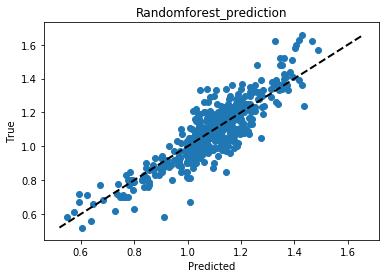

In [58]:
plt.scatter(predicted, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Randomforest_prediction")
plt.show()